In [2]:
# config
config = {
    "data_path": "../",
    "model": {
        "encoder_name": "timm-resnest26d",
        "loss_smooth": 1.0,
        "optimizer_params": {"lr": 0.001, "weight_decay": 0.0},
        "scheduler": {
            "name": "CosineAnnealingLR",
            "params": {
                "CosineAnnealingLR": {"T_max": 50, "eta_min": 1e-06, "last_epoch": -1},
                "ReduceLROnPlateau": {
                    "factor": 0.316,
                    "mode": "min",
                    "patience": 3,
                    "verbose": True,
                },
            },
        },
        "seg_model": "Unet",
    },
    "output_dir": "pytorchmodels",
    "progress_bar_refresh_rate": 500,
    "seed": 42,
    "train_bs": 128,
    "trainer": {
        "enable_progress_bar": True,
        "max_epochs": 80,
        "min_epochs": 30,
        "accelerator": "mps",
        "devices": 1,
    },
    "valid_bs": 128,
    "workers": 0,
    "device": "mps",
    "folds": {
        "n_splits": 4,
        "random_state": 42,
        "train_folds": [0, 1, 2, 3]
    }
}

import pandas as pd
from process_datant import DataProcessor

# Loading the data
X_train = pd.read_csv('data/single_turbine_data_notemp/X_train.csv')
X_test = pd.read_csv('data/single_turbine_data_notemp/X_test.csv')
y_train = pd.read_csv('data/single_turbine_data_notemp/y_train.csv')
y_test = pd.read_csv('data/single_turbine_data_notemp/y_test.csv')

y_train['# Date and time'] = pd.to_datetime(y_train['# Date and time'])
y_test['# Date and time'] = pd.to_datetime(y_test['# Date and time'])

y_train.set_index('# Date and time', inplace=True)
y_test.set_index('# Date and time', inplace=True)

processor = DataProcessor(X_train)
processor.process_all()
X_train = processor.data

processor = DataProcessor(X_test)
processor.process_all()
X_test = processor.data

cols = ['1_Wind direction (°)', '1_Nacelle position (°)', '1_Power (kW)',
       '1_Generator RPM (RPM)', '1_Wind direction (°)_change',
       '1_Nacelle position (°)_change', '1_Power (kW)_change',
       '1_Generator RPM (RPM)_change', 'curtailed', 'offline',
       '1_Wind direction (°)_rollmean', '1_Wind direction (°)_rollstd',
       '1_Wind direction (°)_crest_factor', '1_Nacelle position (°)_rollmean',
       '1_Nacelle position (°)_rollstd', '1_Nacelle position (°)_crest_factor',
       '1_Power (kW)_rollmean', '1_Power (kW)_rollstd',
       '1_Power (kW)_crest_factor', '1_Generator RPM (RPM)_rollmean',
       '1_Generator RPM (RPM)_rollstd', '1_Generator RPM (RPM)_crest_factor',
       '1_Wind direction (°)_lead6', '1_Nacelle position (°)_lead3',
       '1_Power (kW)_lag6', '1_Generator RPM (RPM)_lead6', 'month_sin',
       'month_cos', 'hour_sin', 'hour_cos']

# cols = original_cols
# X_train = X_train[cols]
# X_test = X_test[cols]

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

all_data = pd.concat([train_data, test_data], axis=0)


# scale the data
from sklearn.preprocessing import StandardScaler, RobustScaler
scalerx = RobustScaler()
scalery = RobustScaler()
X_train = scalerx.fit_transform(X_train)
X_test = scalerx.transform(X_test)
y_train = scalery.fit_transform(y_train)
y_test = scalery.transform(y_test)

/Users/johnny/anaconda3/envs/kaggle/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/johnny/anaconda3/envs/kaggle/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/johnny/anaconda3/envs/kaggle/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/johnny/anaconda3/envs/kaggle/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and wil

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type      | Params
-------------------------------------
0 | layer1 | Linear    | 1.9 K 
1 | layer2 | Linear    | 3.7 K 
2 | layer5 | Linear    | 61    
3 | relu   | LeakyReLU | 0     
4 | loss   | MSELoss   | 0     
-------------------------------------
5.6 K     Trainable params
0         Non-trainable params
5.6 K     Total params
0.022     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/Users/johnny/anaconda3/envs/kaggle/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.523
Epoch 0, global step 1241: 'val_loss' reached 0.52336 (best 0.52336), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.228 >= min_delta = 0.0. New best score: 0.296
Epoch 1, global step 2482: 'val_loss' reached 0.29551 (best 0.29551), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.291
Epoch 2, global step 3723: 'val_loss' reached 0.29092 (best 0.29092), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.021 >= min_delta = 0.0. New best score: 0.270
Epoch 3, global step 4964: 'val_loss' reached 0.26988 (best 0.26988), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.263
Epoch 4, global step 6205: 'val_loss' reached 0.26262 (best 0.26262), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.260
Epoch 5, global step 7446: 'val_loss' reached 0.25963 (best 0.25963), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.253
Epoch 6, global step 8687: 'val_loss' reached 0.25296 (best 0.25296), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 0.240
Epoch 7, global step 9928: 'val_loss' reached 0.23965 (best 0.23965), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 8, global step 11169: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.238
Epoch 9, global step 12410: 'val_loss' reached 0.23757 (best 0.23757), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.237
Epoch 10, global step 13651: 'val_loss' reached 0.23728 (best 0.23728), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 11, global step 14892: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 0.225
Epoch 12, global step 16133: 'val_loss' reached 0.22481 (best 0.22481), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 13, global step 17374: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.223
Epoch 14, global step 18615: 'val_loss' reached 0.22272 (best 0.22272), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 15, global step 19856: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 16, global step 21097: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.216
Epoch 17, global step 22338: 'val_loss' reached 0.21602 (best 0.21602), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 18, global step 23579: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.214
Epoch 19, global step 24820: 'val_loss' reached 0.21419 (best 0.21419), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 20, global step 26061: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 21, global step 27302: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 22, global step 28543: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 23, global step 29784: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.209
Epoch 24, global step 31025: 'val_loss' reached 0.20899 (best 0.20899), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 25, global step 32266: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 26, global step 33507: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 27, global step 34748: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 28, global step 35989: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.207
Epoch 29, global step 37230: 'val_loss' reached 0.20687 (best 0.20687), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v47.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 30, global step 38471: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 31, global step 39712: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 32, global step 40953: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 33, global step 42194: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 34, global step 43435: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 35, global step 44676: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 36, global step 45917: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 8 records. Best score: 0.207. Signaling Trainer to stop.
Epoch 37, global step 47158: 'val_loss' was not in top 1


Test RMSE: 2.883


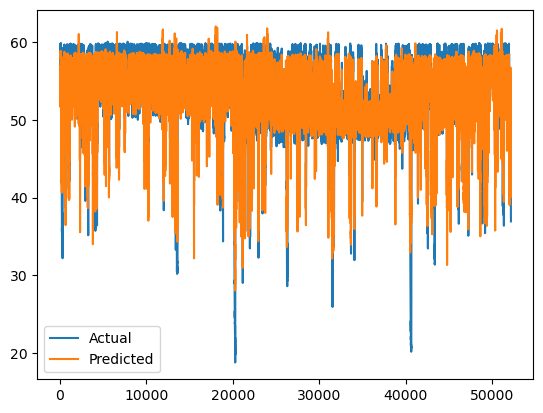

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from lightning.pytorch.callbacks import ModelCheckpoint, EarlyStopping, TQDMProgressBar
import lightning.pytorch as pl
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau

# Convert Pandas DataFrame to PyTorch Tensor
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=config['train_bs'], shuffle=False)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=config['valid_bs'], shuffle=False)

def quantile_loss(preds, targets, alpha=0.05):
    errors = targets - preds
    
    lower_quantile = torch.max((alpha - 1) * errors, alpha * errors).mean()
    upper_quantile = torch.max(((1 - alpha) - 1) * errors, (1 - alpha) * errors).mean()
    
    return lower_quantile + upper_quantile



# Define Neural Network
class LightningModule(pl.LightningModule):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.config = config
        self.layer1 = nn.Linear(input_dim, input_dim*2)
        self.layer2 = nn.Linear(input_dim*2, input_dim*2)
        # self.layer3 = nn.Linear(input_dim, input_dim)
        # self.layer4 = nn.Linear(input_dim, input_dim)
        self.layer5 = nn.Linear(input_dim*2, output_dim)
        # self.relu = nn.ReLU()
        self.relu = nn.LeakyReLU(0.3)
        # self.dropout = nn.Dropout(p=0.2)
        self.loss = nn.MSELoss()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        # x = self.dropout(x)
        x = self.relu(self.layer2(x))
        # x = self.dropout(x)
        # x = self.relu(self.layer3(x))
        # x = self.dropout(x)
        # x = self.relu(self.layer4(x))
        # x = self.dropout(x)
        x = self.layer5(x)
        return x

    def configure_optimizers(self):
        optimizer = AdamW(self.parameters())

        if self.config['model']["scheduler"]["name"] == "CosineAnnealingLR":
            scheduler = CosineAnnealingLR(
                optimizer,
                **self.config['model']["scheduler"]["params"][self.config['model']["scheduler"]["name"]],
            )
            lr_scheduler_dict = {"scheduler": scheduler, "interval": "step"}
            return {"optimizer": optimizer, "lr_scheduler": lr_scheduler_dict}
        elif self.config['model']["scheduler"]["name"] == "ReduceLROnPlateau":
            scheduler = ReduceLROnPlateau(
                optimizer,
                **self.config['model']["scheduler"]["params"][self.config['model']["scheduler"]["name"]],
            )
            lr_scheduler = {"scheduler": scheduler, "monitor": "val_loss"}
            return {"optimizer": optimizer, "lr_scheduler": lr_scheduler}

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = self.loss(y_hat, y)
        self.log("train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        for param_group in self.trainer.optimizers[0].param_groups:
            lr = param_group["lr"]
        self.log("lr", lr, on_step=False, on_epoch=True, prog_bar=True)
        logs = {"train_loss": loss, "lr": lr}
        return {"loss": loss, "log": logs}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = self.loss(y_hat, y)
        self.log("val_loss", loss, on_epoch=True, prog_bar=True)
        return {"val_loss": loss}


early_stop_callback = EarlyStopping(monitor="val_loss", mode="min", patience=8, verbose=1)
progress_bar_callback = TQDMProgressBar(refresh_rate=config["progress_bar_refresh_rate"])
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    mode="min",
    save_top_k=1,
    verbose=1,
    dirpath=config["output_dir"],
    filename="best_model",
)

from lightning.pytorch.loggers import TensorBoardLogger

logger = TensorBoardLogger("tb_logs", name="my_model")

trainer = pl.Trainer(
        callbacks=[early_stop_callback, progress_bar_callback, checkpoint_callback],
         logger=logger, **config["trainer"]
    )

# Train the model
model = LightningModule(X_train.shape[1], y_train.shape[1])
trainer.fit(model, train_loader, test_loader)

# Test the model
model.eval()
y_pred = model(X_test_tensor)
y_pred = y_pred.detach().numpy()
y_pred = scalery.inverse_transform(y_pred)

# Evaluate the model
from sklearn.metrics import mean_squared_error
from math import sqrt

# unscale the data
y_test = scalery.inverse_transform(y_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)

# Plot the results
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


from pathlib import Path
# Save results
results_file = Path('results.csv')
results_df = pd.DataFrame(
    {
        'Model': 'Neural Network',
        'Training RMSE': trainer.logged_metrics['train_loss'].item(),
        'Validation RMSE': rmse,
        'Iterations': trainer.global_step,
        'Learning Rate': config['model']['optimizer_params']['lr'],
        'Depth': [X_train.shape[1], 64, 64, y_train.shape[1]],
        'Loss Function': 'MSE',
        'Features': ', '.join(cols),
    }
)

if results_file.exists():
    existing_df = pd.read_csv(results_file)
    results_df = pd.concat([existing_df, results_df])

results_df.to_csv(results_file, index=False)

In [5]:
trainer.logged_metrics

{'val_loss': tensor(0.0067),
 'train_loss': tensor(0.0096),
 'lr': tensor(0.0005)}

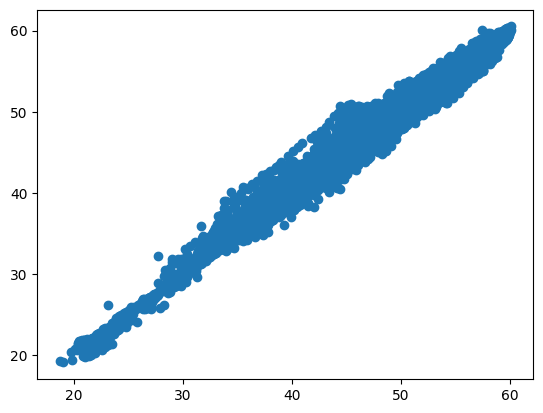

In [5]:
plt.scatter(y_test, y_pred)

In [27]:
# load the best checkpoint
state_dict = torch.load(f'{config["output_dir"]}/best_model.ckpt')
model = LightningModule(X_train.shape[1], y_train.shape[1])
model.load_state_dict(state_dict['state_dict'])

# save the model
torch.save(model.state_dict(), f'{config["output_dir"]}/nn483.pt')

In [26]:
# load the model and make predictions
state_dict = torch.load(f'{config["output_dir"]}/best_model.ckpt')
model = LightningModule(X_train.shape[1], y_train.shape[1])
model.load_state_dict(state_dict['state_dict'])
model.eval()
y_pred = model(X_test_tensor)
y_pred = y_pred.detach().numpy()
y_pred = scaler.inverse_transform(y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.483


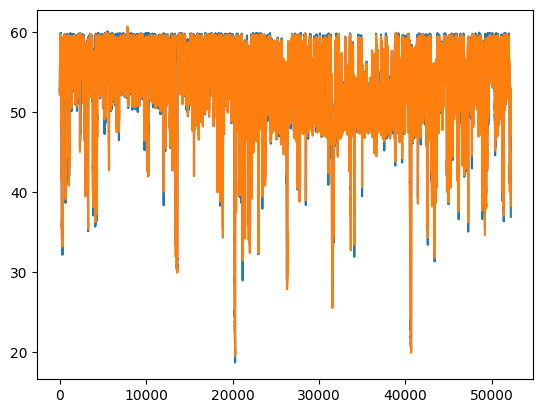

In [11]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

In [22]:
class LightningModule(pl.LightningModule):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.config = config
        self.layer1 = nn.Linear(input_dim, input_dim*2)
        self.layer2 = nn.Linear(input_dim*2, input_dim*2)
        self.layer3 = nn.Linear(input_dim*2, output_dim)
        # self.relu = nn.ReLU()
        self.relu = nn.LeakyReLU(0.3)
        # self.dropout = nn.Dropout(p=0.2)
        self.loss = nn.MSELoss()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        # x = self.dropout(x)
        x = self.relu(self.layer2(x))
        # x = self.dropout(x)
        x = self.layer3(x)
        return x

    def configure_optimizers(self):
        optimizer = AdamW(self.parameters())

        if self.config['model']["scheduler"]["name"] == "CosineAnnealingLR":
            scheduler = CosineAnnealingLR(
                optimizer,
                **self.config['model']["scheduler"]["params"][self.config['model']["scheduler"]["name"]],
            )
            lr_scheduler_dict = {"scheduler": scheduler, "interval": "step"}
            return {"optimizer": optimizer, "lr_scheduler": lr_scheduler_dict}
        elif self.config['model']["scheduler"]["name"] == "ReduceLROnPlateau":
            scheduler = ReduceLROnPlateau(
                optimizer,
                **self.config['model']["scheduler"]["params"][self.config['model']["scheduler"]["name"]],
            )
            lr_scheduler = {"scheduler": scheduler, "monitor": "val_loss"}
            return {"optimizer": optimizer, "lr_scheduler": lr_scheduler}

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = self.loss(y_hat, y)
        self.log("train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        for param_group in self.trainer.optimizers[0].param_groups:
            lr = param_group["lr"]
        self.log("lr", lr, on_step=False, on_epoch=True, prog_bar=True)
        logs = {"train_loss": loss, "lr": lr}
        return {"loss": loss, "log": logs}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = self.loss(y_hat, y)
        self.log("val_loss", loss, on_epoch=True, prog_bar=True)
        return {"val_loss": loss}